In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from data_import import import_ppd
from scipy.signal import savgol_filter
from scipy.stats import sem
from scipy.ndimage import uniform_filter1d
import openpyxl 

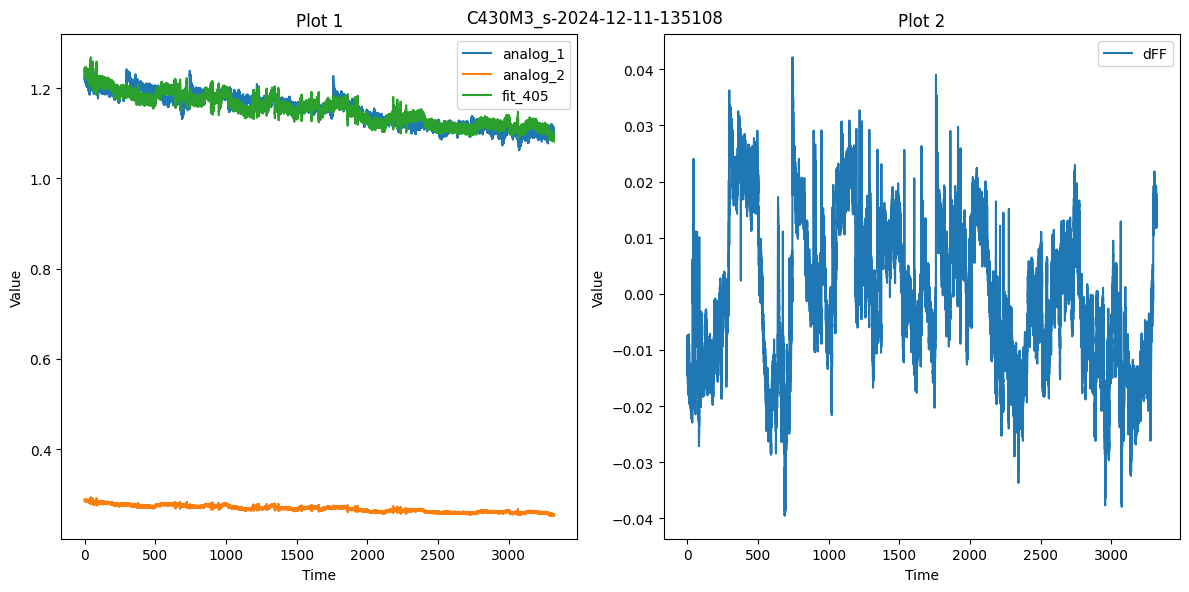

index: (array([  3291,   3363,   6333,   6417,   9269,   9350,   9351,   9352,
        12652,  12744,  15310,  15426,  18397,  18505,  21197,  21532,
        24458,  24459,  24460,  24461,  24462,  24938,  27270,  27637,
        39329,  39330,  39331,  39397,  42615,  42679,  45468,  45511,
        48260,  48334,  51675,  51748,  54482,  54552,  57221,  57252,
        60431,  60486,  63395,  63460,  66331,  66587,  70520,  70893,
        72591,  72937,  75535,  75623,  78537,  78664,  81228,  81366,
        93354,  93416,  93417,  93418,  96300,  96383,  99128,  99206,
       102279, 102351, 105308, 105386, 108508, 108572, 111455, 111562,
       114356, 114480, 117196, 117298, 120166, 120531, 120532, 120533,
       125814, 126100, 132069, 132148, 135251, 135327, 138519, 138565,
       141237, 141300, 144490, 144535, 156092, 156160, 159194, 159257,
       162005, 162083, 174682, 174945, 177099, 177196, 177389, 177668,
       180417, 180881, 183097, 183163, 186211, 186273, 189264, 189322

In [27]:
# Define the PPD file path

# ACh data salient sensory stimulation 

# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M1_s-2024-12-10-113010.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M2_s-2024-12-10-134149.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M3_s-2024-12-10-153245.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M4_s-2024-12-11-101212.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M1_s-2024-12-09-123214.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M2_s-2024-12-09-140601.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M3_s-2024-12-09-154339.ppd'
# ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C430M1_s-2024-12-11-121507.ppd'
ppd_file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C430M3_s-2024-12-11-135108.ppd'

# LDB data files 

# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C426M1_LDB-2024-12-18-111805.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C426M2_LDB-2024-12-18-115240.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C426M3_LDB-2024-12-18-135407.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C427M1_LDB-2024-12-18-102925.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C427M2_LDB-2024-12-18-110047.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C427M3_LDB-2024-12-18-113429.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C430M1_LDB-2024-12-18-133541.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\LDB\C430M3_LDB-2024-12-18-141900.ppd'

# NA data salient sensory stimulation 

# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C429M2-s-2025-01-31-153204.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C429M3-s-2025-02-02-140409.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C431M2-s-2025-01-31-135652.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C431M3-s-2025-02-02-155509.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C432M2-s-2025-01-31-084937.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C434M3-s-2025-01-30-104322.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C435M2-s-2025-02-03-100201.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C435M3-s-2025-02-03-113856.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C436M2-s-2025-01-31-102446.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C436M3-s-2025-01-31-122019.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C437M2-s-2025-02-03-133847.ppd'
# ppd_file_path = r'H:\Magdalena\photometry\fp_recordings\NA_sensory\new batch\salient\C437M3-s-2025-02-04-134304.ppd'


# Extract the filename without the extension
filename = os.path.splitext(os.path.basename(ppd_file_path))[0]

# Load the data from the CSV file
data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)

# Convert sample index to time vector
time = np.arange(len(data['analog_1'])) / 100                              

# http://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline
reg= np.polyfit(data['analog_2'], data['analog_1'], 1) # ch1 is 465nm, ch2 is 405nm 
fit_405=reg[0]*data['analog_2']+reg[1]
dFF=(data['analog_1']-fit_405)/fit_405 #this gives deltaF/F

#Function to apply smoothing to the data
def smooth_trace(trace, window_size):
    return uniform_filter1d(trace, size=window_size)
dFF = smooth_trace(dFF, 10)

data['fit_405']=fit_405
data['dFF']=dFF

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
ax1.plot(time, data['analog_1'], label='analog_1')
ax1.plot(time, data['analog_2'], label='analog_2')
ax1.plot(time, data['fit_405'], label='fit_405')

# Set plot 1 properties
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Plot 1')
ax1.legend()

# Plot 2
ax2.plot(time, data['dFF'], label='dFF')

# Set plot 2 properties
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title('Plot 2')
ax2.legend()
# changing the plot range
# ax2.set_xlim([1200,1230])
# ax2.set_ylim([-0.02,0.03])

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure title
fig.suptitle(filename)

# Save the figure as PNG with 300 dpi
save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.pdf')
fig.savefig(save_path, format='pdf', dpi=300)

# Display the plots
plt.show()


# Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
index = np.where((np.diff(data['digital_1']) > 0.5) | (np.diff(data['digital_1']) < -0.5))

# Print the onsets and offsets
print("index:", index)

dFF = dFF[index[0][0]:]

In [28]:
# Load the Excel file

# ACh data salient sensory stimulation 

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C426M4_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M1_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M2_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C427M3_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C430M1_log.xlsx'
file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\salient\ACh\C430M3_log.xlsx'

# NA data salient sensory stimulation 

# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C429M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C429M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C431M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C431M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C432M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C434M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C435M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C435M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C436M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C436M3_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C437M2_s_log.xlsx'
# file_path = r'H:\Magdalena\behavioral experiments\sensory stimulation\NA Jan 2025\salient\C437M3_s_log.xlsx'


excel_data = pd.read_excel(file_path)

# Extract the stimulus (Stim) value from the 'Event' column
excel_data['Stim'] = excel_data['Event'].apply(lambda x: int(x.split(':')[0]))


# Subtract 'ledonset' from the 'Frame' column and convert to string

# ACh data salient sensory stimulation

# ledonset = 2002 # for mouse C426M1
# ledonset = 1150 # for mouse C426M2
# ledonset = 1362 # for mouse C426M3
# ledonset = 1294 # for mouse C426M4
# ledonset = 1275 # for mouse C427M1
# ledonset = 2029 # for mouse C427M2
# ledonset = 1162 # for mouse C427M3
# ledonset = 1278 # for mouse C430M1
ledonset = 1275 # for mouse C430M3

# NA data salient sensory stimulation

# ledonset = 1717 # for mouse C429M2
# ledonset = 1309 # for mouse C429M3
# ledonset = 2525 # for mouse C431M2
# ledonset = 2153 # for mouse C431M3
# ledonset = 1192 # for mouse C432M2
# ledonset = 2054 # for mouse C434M3
# ledonset = 2041 # for mouse C435M2
# ledonset = 1065 # for mouse C435M3
# ledonset = 1459 # for mouse C436M2
# ledonset = 1426 # for mouse C436M3
# ledonset = 2152 # for mouse C437M2
# ledonset = 1858 # for mouse C437M3


fps = 30
excel_data['Time'] = ((excel_data['Frame'] - ledonset) / fps).astype(str)

# Organize data into a dictionary
data = {
    'Mouse': {
        'Stim': excel_data['Stim'].tolist(),
        'Time': excel_data['Time'].tolist()
    }
}

# Use `data` as needed in your analysis

stim_data = data['Mouse']['Stim']
time_stamps = data['Mouse']['Time']
sampling_rate = 100
fps = 30

air_puff_indexes = [i for i, stim in enumerate(stim_data) if stim == 0]
light_indexes = [i for i, stim in enumerate(stim_data) if stim == 1]
mock_stim_indexes = [i for i, stim in enumerate(stim_data) if stim == 2]
hard_indexes = [i for i, stim in enumerate(stim_data) if stim == 3]
sound_indexes = [i for i, stim in enumerate(stim_data) if stim == 4]
choc_milk_indexes = [i for i, stim in enumerate(stim_data) if stim == 5]
end_choc_milk_indexes = [i for i, stim in enumerate(stim_data) if stim == 6]

air_puff_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in air_puff_indexes]
light_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in light_indexes]
mock_stim_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in mock_stim_indexes]
hard_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in hard_indexes]
sound_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in sound_indexes]
choc_milk_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in choc_milk_indexes]
end_choc_milk_data_indexes = [round(float(time_stamps[i]) * sampling_rate) for i in end_choc_milk_indexes]


trace_duration = 5  # 5 seconds before and 30 seconds after each data index

# Convert trace duration from seconds to data points
trace_duration_points = trace_duration * sampling_rate

# Function to analyze and plot data for different index sets
def analyze_and_plot(indexes, dFF, sampling_rate, pre_start=5, post_start=20):
    trace_data_matrix = []

    for index in indexes:
        start = int(index - pre_start * sampling_rate)
        end = int(index + post_start * sampling_rate)
        trace_data = dFF[start:end]
        time = np.arange(start, end) / sampling_rate

        # Calculate the baseline value
        baseline_start = int(index - 5 * sampling_rate)
        baseline_end = int(index - 3 * sampling_rate)
        baseline = np.mean(dFF[baseline_start:baseline_end])

        # Compute the relative trace data
        relative_trace_data = trace_data - baseline

        # Append relative_trace_data to the matrix
        trace_data_matrix.append(relative_trace_data)


    return np.array(trace_data_matrix)

# Example usage for each data index set
trace_data_matrix_air_puff = analyze_and_plot(air_puff_data_indexes, dFF, sampling_rate)
trace_data_matrix_light = analyze_and_plot(light_data_indexes, dFF, sampling_rate)
trace_data_matrix_mock_stim = analyze_and_plot(mock_stim_data_indexes, dFF, sampling_rate)
trace_data_matrix_hard = analyze_and_plot(hard_data_indexes, dFF, sampling_rate)
trace_data_matrix_sound = analyze_and_plot(sound_data_indexes, dFF, sampling_rate)
trace_data_matrix_choc_milk = analyze_and_plot(choc_milk_data_indexes, dFF, sampling_rate)
trace_data_matrix_end_choc_milk = analyze_and_plot(end_choc_milk_data_indexes, dFF, sampling_rate)


In [29]:
    
# Create the time vector for the first row
pre_start = 5
post_start = 20
sampling_rate = 100  # Replace with your actual sampling rate
time_vector = np.arange(-pre_start, post_start, 1/sampling_rate)

# Convert trace data to DataFrame and add time vector as the first row

df_air_puff= pd.DataFrame(trace_data_matrix_air_puff) 
df_light= pd.DataFrame(trace_data_matrix_light)
df_mock_stim= pd.DataFrame(trace_data_matrix_mock_stim)
df_hard= pd.DataFrame(trace_data_matrix_hard)
df_sound= pd.DataFrame(trace_data_matrix_sound)
df_choc_milk= pd.DataFrame(trace_data_matrix_choc_milk)
df_end_choc_milk= pd.DataFrame(trace_data_matrix_end_choc_milk)

df_air_puff.loc[-1] = time_vector  # Add time vector as the first row
df_air_puff.index = df_air_puff.index + 1  # Shift index
df_air_puff.sort_index(inplace=True)  # Sort index

df_light.loc[-1] = time_vector  # Add time vector as the first row
df_light.index = df_light.index + 1  # Shift index
df_light.sort_index(inplace=True)  # Sort index

df_mock_stim.loc[-1] = time_vector  # Add time vector as the first row
df_mock_stim.index = df_mock_stim.index + 1  # Shift index
df_mock_stim.sort_index(inplace=True)  # Sort index

df_hard.loc[-1] = time_vector  # Add time vector as the first row
df_hard.index = df_hard.index + 1  # Shift index
df_hard.sort_index(inplace=True)  # Sort index

df_sound.loc[-1] = time_vector  # Add time vector as the first row
df_sound.index = df_sound.index + 1  # Shift index
df_sound.sort_index(inplace=True)  # Sort index

df_choc_milk.loc[-1] = time_vector  # Add time vector as the first row
df_choc_milk.index = df_choc_milk.index + 1  # Shift index
df_choc_milk.sort_index(inplace=True)  # Sort index


df_end_choc_milk.loc[-1] = time_vector  # Add time vector as the first row
df_end_choc_milk.index = df_end_choc_milk.index + 1  # Shift index
df_end_choc_milk.sort_index(inplace=True)  # Sort index


mouse_number="C430M3"
ppd_file_dir = r'H:\Magdalena\photometry\fp_recordings\data in excel files\ACh batch two Jan 2025\salient'
# Save to Excel
air_puff_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_air_puff_traces.xlsx')
df_air_puff.to_excel(air_puff_excel_path, index=False)
light_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_light_traces.xlsx')
df_light.to_excel(light_excel_path, index=False)
mock_stim_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_mock_stim_traces.xlsx')
df_mock_stim.to_excel(mock_stim_excel_path, index=False)
hard_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_hard_traces.xlsx')
df_hard.to_excel(hard_excel_path, index=False)
sound_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_sound_traces.xlsx')
df_sound.to_excel(sound_excel_path, index=False)
choc_milk_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_choc_milk_traces.xlsx')
df_choc_milk.to_excel(choc_milk_excel_path, index=False)
end_choc_milk_excel_path = os.path.join(ppd_file_dir, f'Mouse_{mouse_number}_end_choc_milk_traces.xlsx')
df_end_choc_milk.to_excel(end_choc_milk_excel_path, index=False)